In [1]:
# initial setup
import pandas as pd
import matplotlib

%matplotlib inline

# some display options to make figures bigger
# hide this
pd.set_option('display.max_columns', 15)
pd.set_option('display.line_width', 400)
pd.set_option('display.mpl_style', 'default')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)


line_width has been deprecated, use display.width instead (currently both are
identical)



In [2]:
from thclient import PerfherderClient, PerformanceTimeInterval

pc = PerfherderClient()
signatures = pc.get_performance_signatures('mozilla-central')
# lots of signatures
signatures = signatures.filter(('suite', 'tp5o'), ('machine_platform', 'windowsxp'), ('test', 'youtube.com'))
print signatures



{u'3b13ac6258e1d9b59e986e14b0070b876ec73f7e': {u'test': u'youtube.com', u'suite': u'tp5o', u'option_collection_hash': u'f69e1b00908837bf0550250abb1645014317e8ec', u'machine_platform': u'windowsxp'}, u'5cfd0cbae43b215ee363ad86a156bc74a791606c': {u'test': u'youtube.com', u'suite': u'tp5o', u'option_collection_hash': u'102210fe594ee9b33d82058545b1ed14f4c8206e', u'machine_platform': u'windowsxp'}, u'7e6ddabf9c6e560ccb84fe992006561b8509b531': {u'test': u'youtube.com', u'suite': u'tp5o', u'machine_platform': u'windowsxp', u'option_collection_hash': u'f69e1b00908837bf0550250abb1645014317e8ec', u'test_options': [u'e10s']}}


([3228, 3231, 3233, 3234, 3239, 3239, 3244, 3244, 3252, 3256, 3257, 3257, 3260, 3267, 3267, 3272, 3272, 3272, 3272, 3272, 3272, 3272, 3272, 3287, 3287, 3291, 3292, 3326, 3327], [156.16, 158.6, 157.96, 155.88, 161.0, 154.52, 156.96, 155.4, 159.36, 157.04, 155.36, 156.4, 158.2, 161.4, 159.52, 159.8, 155.48, 157.72, 156.6, 156.36, 157.6, 155.56, 157.08, 155.52, 155.08, 159.52, 158.6, 160.04, 157.52])


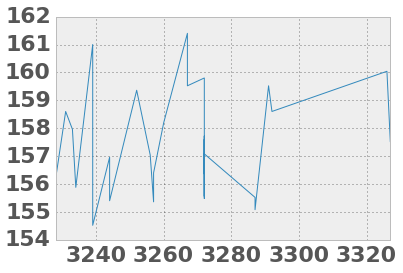

In [6]:
# plot of youtube.com pageload times

series = pc.get_performance_series('mozilla-central', '3b13ac6258e1d9b59e986e14b0070b876ec73f7e')
(result_set_ids, geomeans) = (series['result_set_id'], series['mean'])
print (result_set_ids, geomeans)
pdseries = pd.Series(geomeans, index=result_set_ids)
pdseries.plot(x='result set id', y='load time')